In [127]:
!pip install missingno

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from missingno import matrix

In [129]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')


In [130]:
PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [131]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re

In [132]:
# Download NLTK resources (stopwords and tokenizer)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer
stemmer = PorterStemmer()

# Get English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
# stop_words = {
#     'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
#     'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
#     "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
#     'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
#     'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
#     'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
#     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
#     'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
#     'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
#     'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
#     'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
#     'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
#     "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
# }

In [134]:
def pre_process(text):
    
    # lowercase
    text=str(text).lower()

    # remove numbers followed by dot (like, "1.", "2.", etc)
    text=re.sub('((\d+)[\.])', '', text)
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # correct some misspellings and/or replace some text with others that might be easier to handle
    text=text.replace('do not', "don't")
    
    # remove special characters except spaces, apostrophes and dots
    text=re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
    tokens = [word for word in text.split(' ') if word not in stop_words]
    lmtzr = WordNetLemmatizer()
    lemmatized_text = ' '.join(lmtzr.lemmatize(word) for word in tokens if word not in stop_words)
    
    
    return lemmatized_text

In [135]:
data = load_data("McDonald_s_Reviews.csv")
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


<AxesSubplot: >

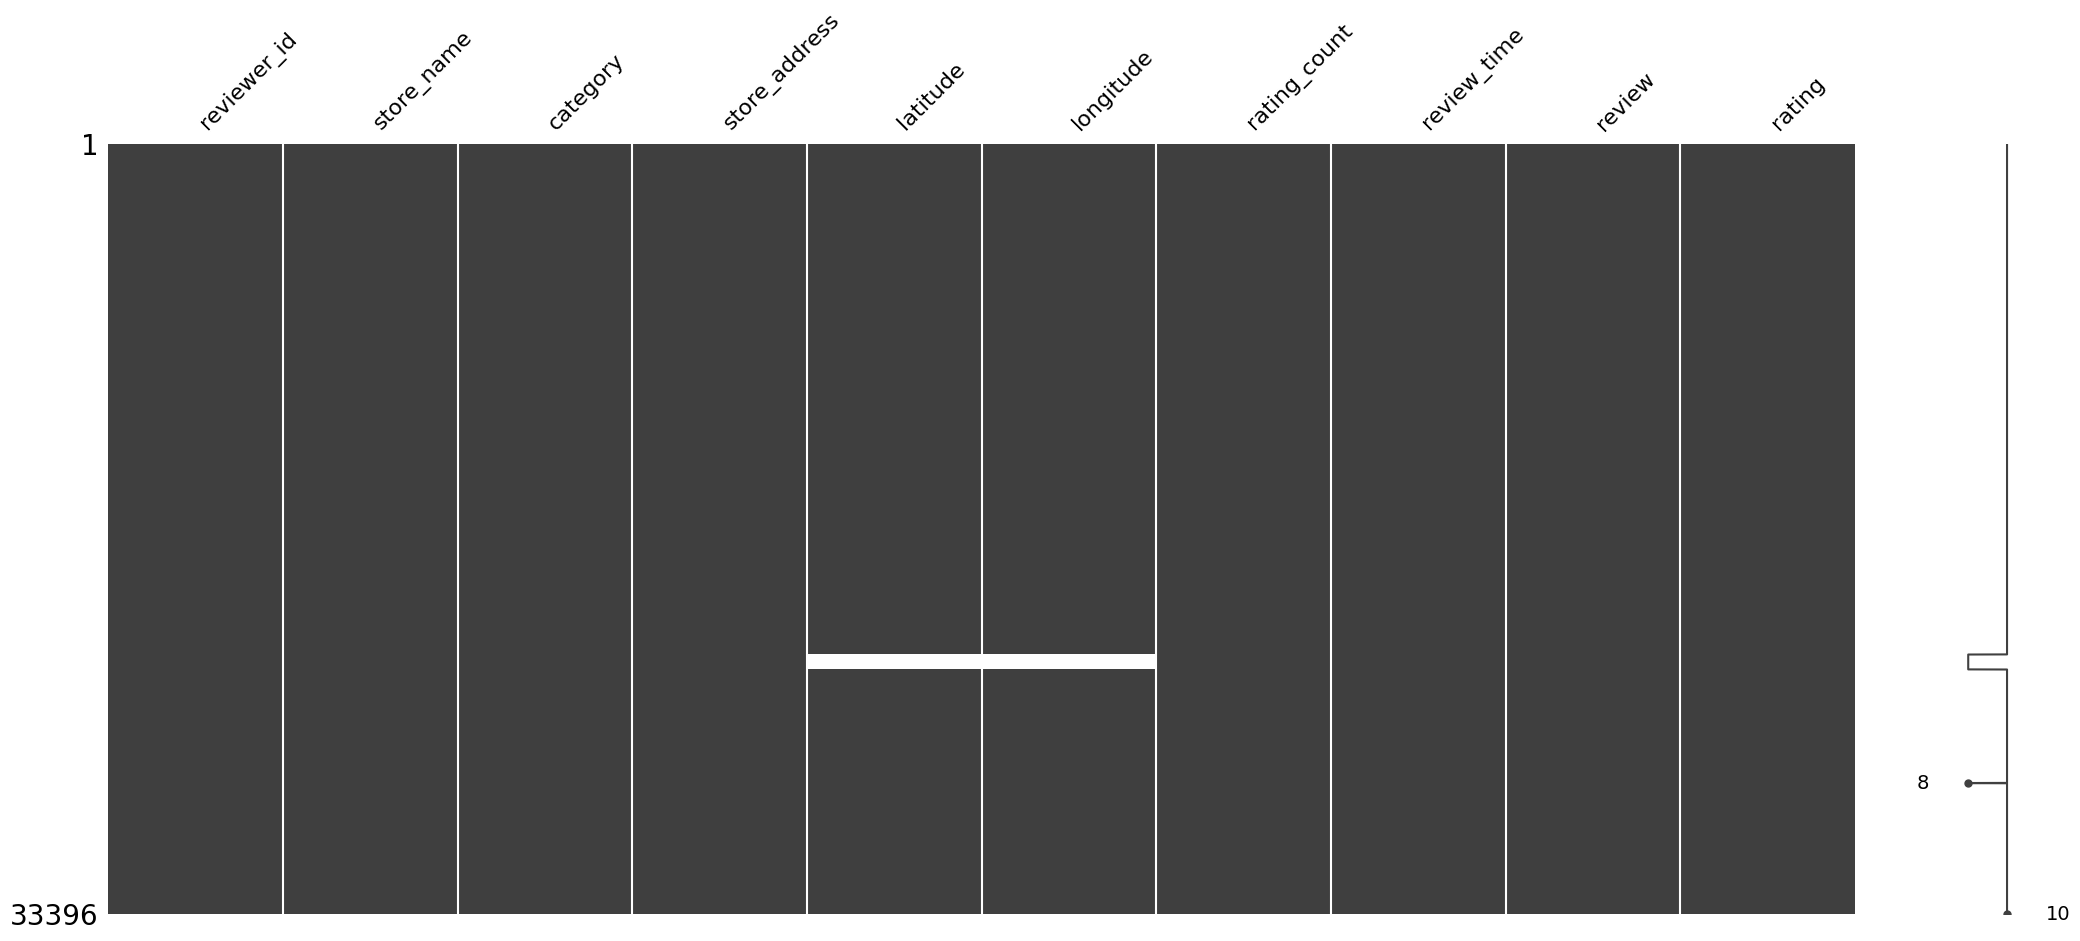

In [136]:
matrix(data)

<AxesSubplot: >

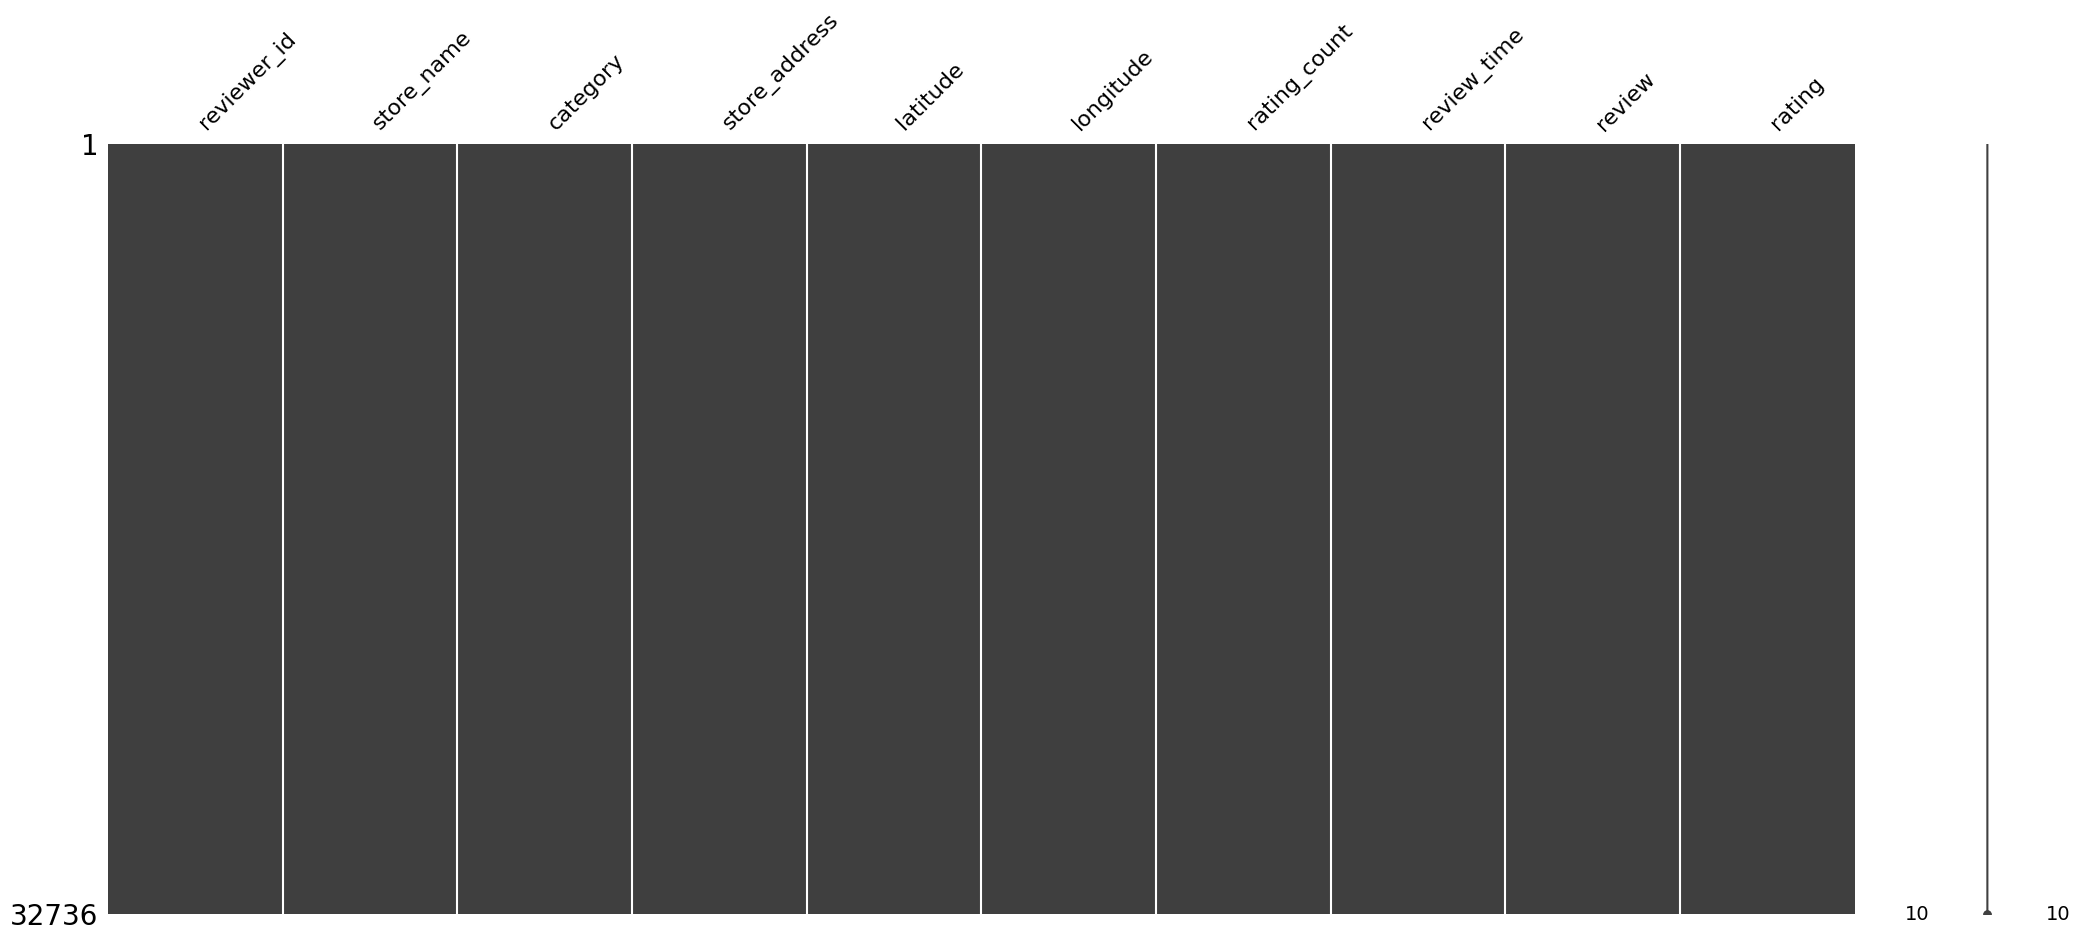

In [137]:
data.dropna(inplace=True)
matrix(data)

In [138]:
# Apply the basic preprocessing to the review column
data['processed_review_basic'] = data['review'].apply(pre_process)

data[['review', 'processed_review_basic']].head()

,review,processed_review_basic
0,Why does it look like someone spit on my food?...,look like someone spit food normal transaction...
1,It'd McDonalds. It is what it is as far as the...,it'd mcdonalds. far food atmosphere go. staff ...
2,Made a mobile order got to the speaker and che...,made mobile order got speaker checked in. line...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,mc. crispy chicken sandwich customer service q...
4,"I repeat my order 3 times in the drive thru, a...",repeat order 3 time drive thru still manage me...


In [139]:
# Drop rows with NaN values in the "processed_review_basic" column
data['processed_review_basic'] = data['processed_review_basic'].fillna('')
data = data[data['processed_review_basic'] != '']

In [140]:
data['rating_numeric'] = data['rating'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) and x.split()[0].isdigit() else None)
data['rating_numeric'].value_counts().sort_index()

C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\1546544394.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1     9266
2     3014
3     4694
4     5633
5    10042
Name: rating_numeric, dtype: int64

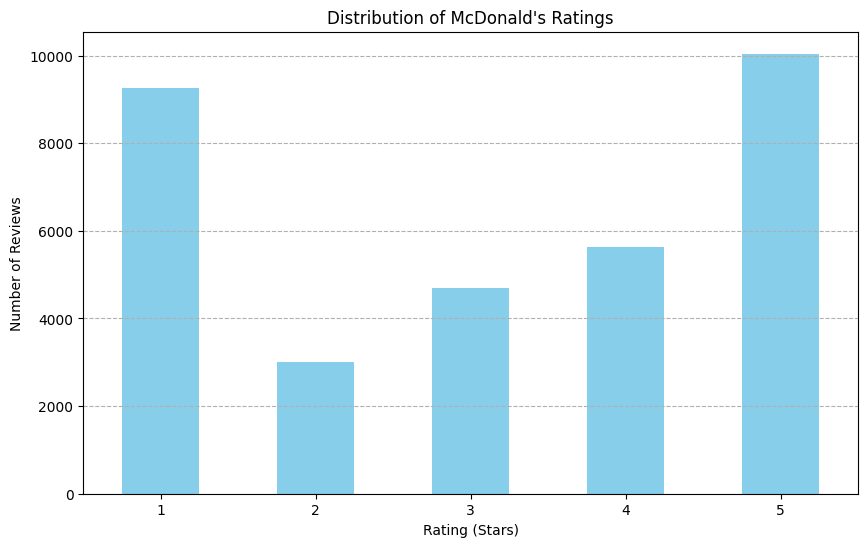

In [141]:
import matplotlib.pyplot as plt

# Plotting the distribution of numeric ratings
data['rating_numeric'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Distribution of McDonald\'s Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()

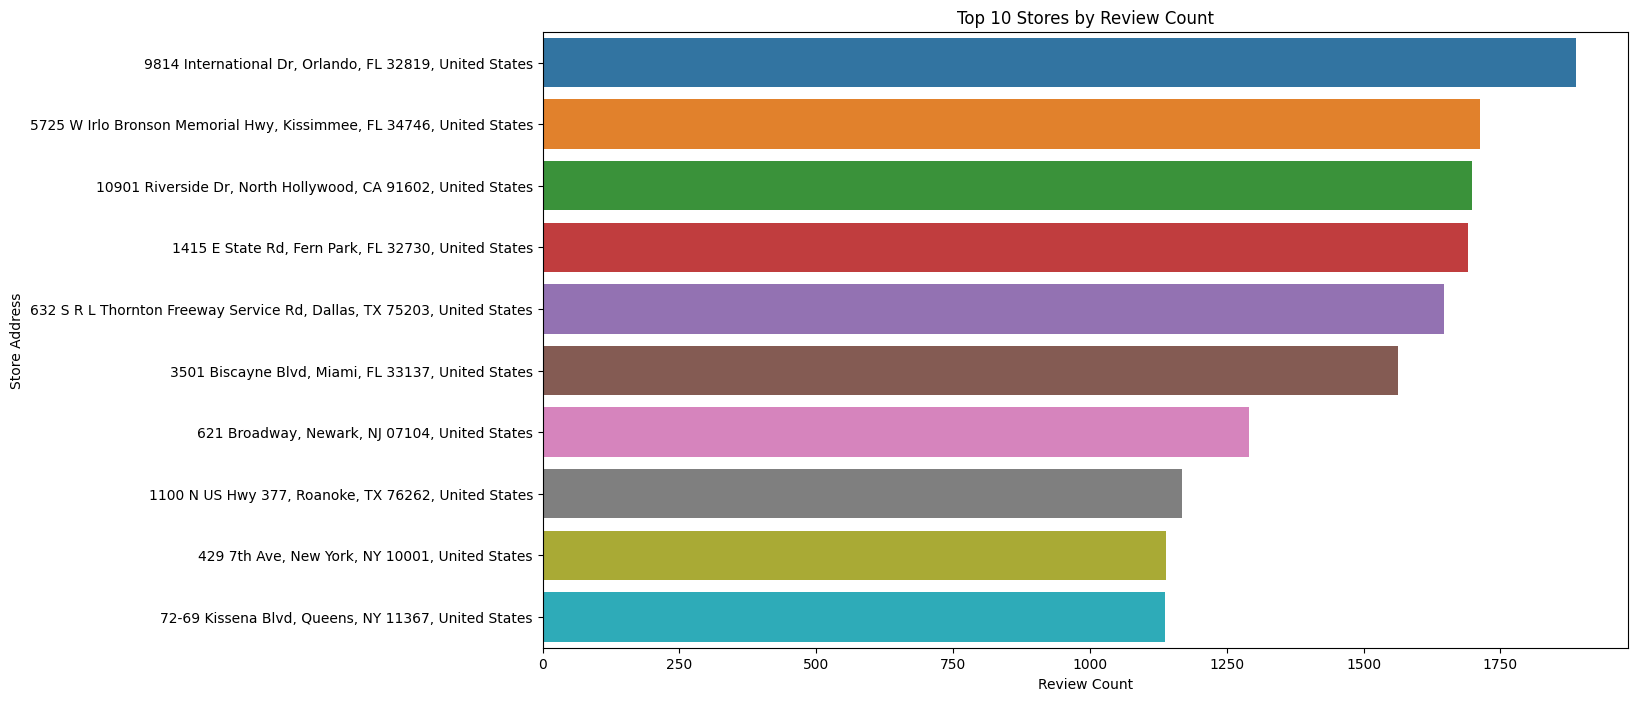

In [142]:
# Review counts per store
import seaborn as sns
plt.figure(figsize=(14, 8))
reviews_per_store = data['store_address'].value_counts().head(10)  # Top 10 stores by review count
sns.barplot(x=reviews_per_store.values, y=reviews_per_store.index)
plt.title('Top 10 Stores by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Store Address')
plt.show()

In [143]:
import plotly.express as px

# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Create the scatter mapbox plot
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude",
                        hover_name="store_name",  # Assuming you want to see store names on hover
                        color_discrete_sequence=["fuchsia"], zoom=3)

# Update the layout to remove margins
fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0, pad=0),
    template="plotly",  # or "plotly_white", "plotly_dark", etc.
)

# Increase the size of the points
fig.update_traces(marker=dict(size=15))

file_path = str(PLOT_PATH) + "/McDonald's location.html"
# Save the figure as HTML
fig.write_html(file_path, full_html=True, auto_open=False, config={"responsive": True})

fig.show()




C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\1321390498.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\1321390498.py:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\161173769.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



Saving figure ratings_boxplot


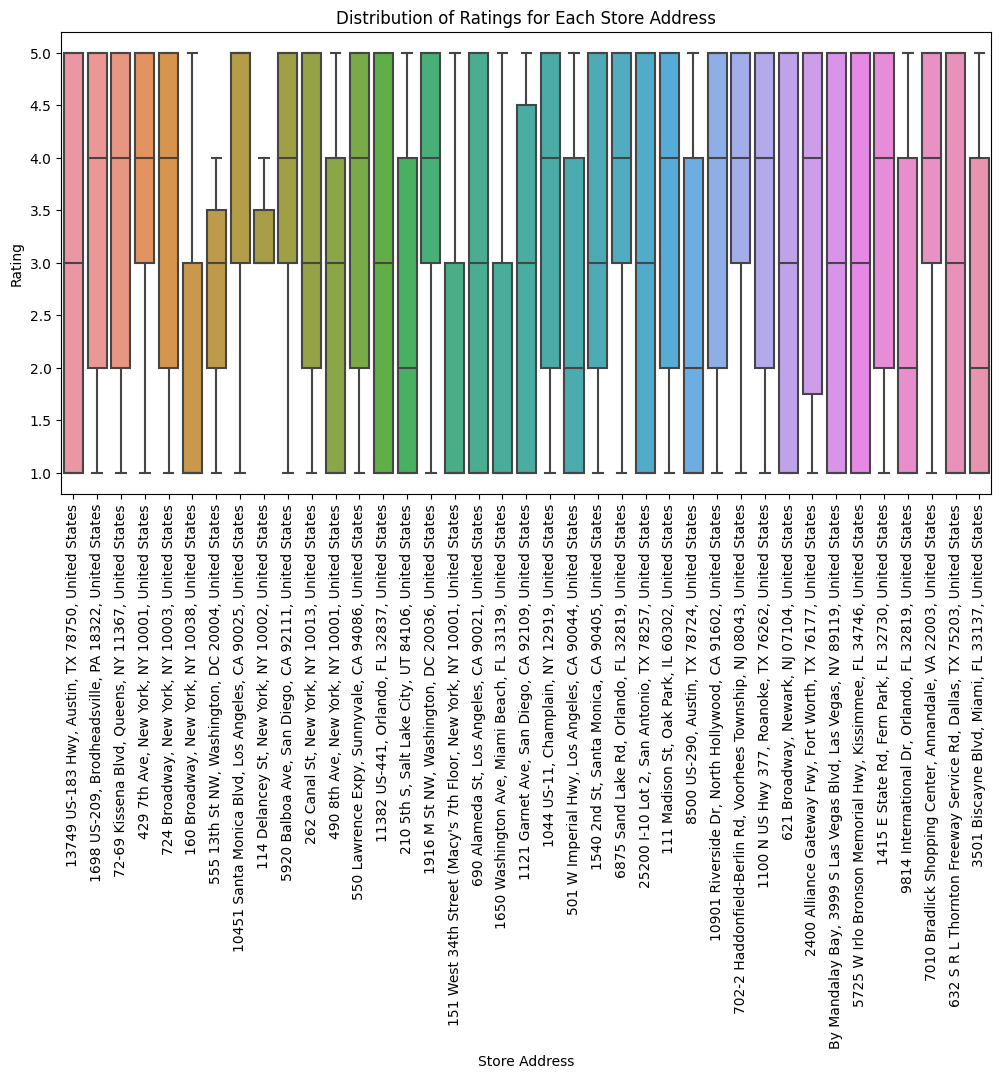

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your actual dataset here
# data = pd.read_csv('path_to_your_data.csv')

# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Convert the 'rating' column to a numerical format
# Assuming the ratings are like "4 stars", "5 stars", etc.
# Extract the numerical part and convert it to an integer
data['rating_numerical'] = data['rating'].str.extract('(\d+)').astype(float)

# Now create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_address', y='rating_numerical', data=data)
plt.title('Distribution of Ratings for Each Store Address')
plt.xlabel('Store Address')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the plot
save_fig("ratings_boxplot")
plt.show()

C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\3699927492.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\TYS\AppData\Local\Temp\ipykernel_30724\3699927492.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Saving figure ratings_boxplot_by_state


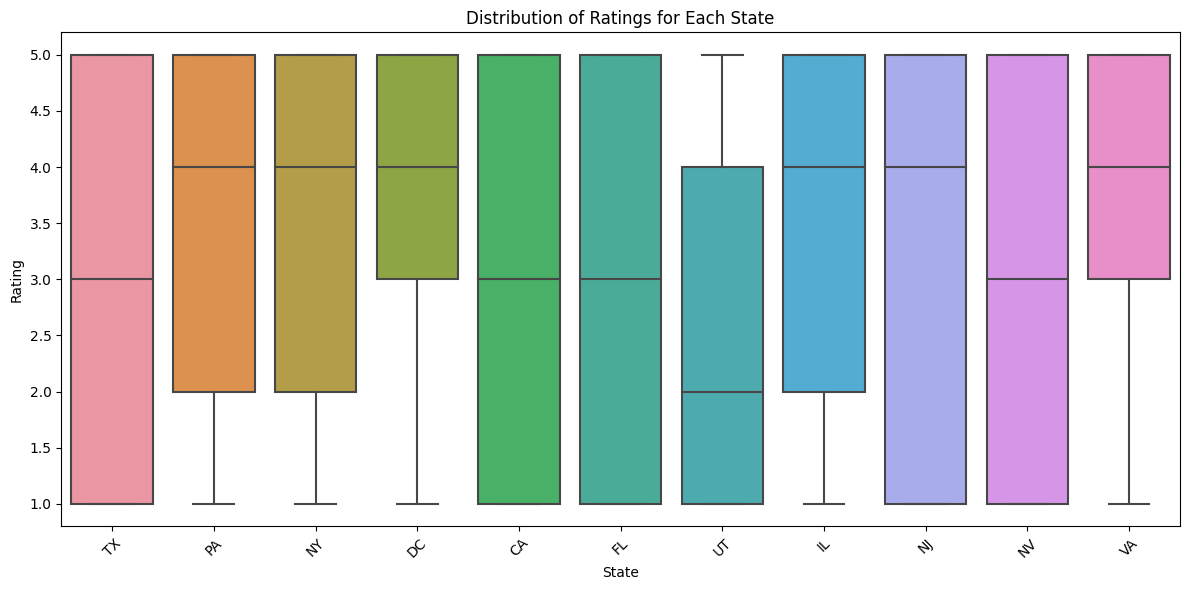

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Convert the 'rating' column to a numerical format
data['rating_numerical'] = data['rating'].str.extract('(\d+)').astype(float)

# Extract state from the 'store_address' column
# Assuming the state abbreviation is the last part after the last comma
data['state'] = data['store_address'].str.extract(r',\s*([A-Z]{2})\s+\d{5}')

# Now create the boxplot based on states
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='rating_numerical', data=data)
plt.title('Distribution of Ratings for Each State')
plt.xlabel('State')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Adjust rotation if necessary
plt.tight_layout()  # Adjust layout to fit the plot
save_fig("ratings_boxplot_by_state")
plt.show()


In [146]:
save_data(data,"McDonald_s_Reviews_Cleaned.csv")